In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# some code to control figure aeshetics
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [31]:
basedir = os.getcwd()
datadir = basedir + '/data'

data = pd.read_csv(datadir + '/microbiome_data.csv')
OTU_annotations = pd.read_csv(datadir + '/otu_annotation.csv')
patients_assay = pd.read_csv(datadir + '/sample_desc_deid.csv')

In [32]:
data = data.T
data.columns = data.iloc[0]

OTUId,OTU_25,OTU_38,OTU_233,OTU_962,OTU_168,OTU_1330,OTU_3,OTU_153,OTU_4,OTU_1123,...,OTU_1704,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382
OTUId,OTU_25,OTU_38,OTU_233,OTU_962,OTU_168,OTU_1330,OTU_3,OTU_153,OTU_4,OTU_1123,...,OTU_1704,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382
1001360178,1152,367,0,55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000106028,306,1091,0,20,0,0,0,1,0,21,...,0,0,0,0,0,0,0,0,0,0
1000160068,459,727,0,17,0,0,0,0,0,146,...,0,0,0,0,0,0,0,0,0,0
1001406208,586,328,959,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NTC52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002101188.rs,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000101168.rs,0,0,0,0,0,0,0,0,44,0,...,0,0,0,0,0,0,0,0,0,0
NTC51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data = data.drop(['OTUId'])

In [4]:
OTU_annotations

,OTUId,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,OTU_25,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
1,OTU_38,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,epidermidis
2,OTU_233,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
3,OTU_962,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
4,OTU_168,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1891,OTU_1764,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,0319-6G20,NaN,NaN
1892,OTU_1854,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN
1893,OTU_1803,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,NaN
1894,OTU_1593,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
patients_assay

,#SampleID,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,...,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
0,1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1,1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,...,1.0,Asian-Japanese,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided,run001,2,NaN,2
2,1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
3,1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
4,1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1010104488.rs,GTCTGACAGTTG,GCACTCCTACGGGAGGCAGCA,Tooth_Gum,10101,311.0,45.0,4.0,F,1.0,...,1.0,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,287,NaN,4398
4398,1002402218.ca2.rs,GTCTGGATAGCG,GCACTCCTACGGGAGGCAGCA,Stool,10024,150.0,22.0,2.0,F,0.0,...,1.0,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,288,15 min,4399
4399,1002302248.bn1.rs,GTCTTCGTCGCT,GCACTCCTACGGGAGGCAGCA,Stool,10023,169.0,25.0,2.0,F,0.0,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,289,15 min,4400
4400,1002102208.ak2.rs,GTGACCTGATGT,GCACTCCTACGGGAGGCAGCA,Stool,10021,139.0,20.0,2.0,F,0.0,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,290,15 min,4401


In [11]:
bodysites = sample_desc.sort_values(by = ['BodySite'])
bodysites

,#SampleID,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,...,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
190,1000160068,CGAGTTGTAGCG,GCACTCCTACGGGAGGCAGCA,Back_of_ear_L,10001,-36.0,-4.0,0.0,T,NaN,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,191,NaN,191
192,1000660208,CGATATTCATCG,GCACTCCTACGGGAGGCAGCA,Back_of_ear_L,10006,139.0,20.0,2.0,F,0.0,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,193,NaN,193
193,1000660218,CGATCGAGTGTT,GCACTCCTACGGGAGGCAGCA,Back_of_ear_L,10006,147.0,21.0,2.0,F,0.0,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,194,NaN,194
194,1000860268,CGATGCACCAGA,GCACTCCTACGGGAGGCAGCA,Back_of_ear_L,10008,185.0,27.0,3.0,F,1.0,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,195,NaN,195
195,1001260198,CGATGTCGTCAA,GCACTCCTACGGGAGGCAGCA,Back_of_ear_L,10012,134.0,20.0,2.0,F,NaN,...,NaN,Black,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,196,NaN,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,1000004080,AGCAGCACTTGT,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CGTATCGCCTCCCTCGCGCCATCAG,NaN,NaN,run010,586,NaN,2245
2261,1000004100,AGTTAGTGCGTC,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CGTATCGCCTCCCTCGCGCCATCAG,NaN,NaN,run010,603,NaN,2262
2263,1000004110,AGTTCTACGTCA,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CGTATCGCCTCCCTCGCGCCATCAG,NaN,NaN,run010,605,NaN,2264
666,1000001220,GCATAGTAGCCG,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CGTATCGCCTCCCTCGCGCCATCAG,NaN,NaN,run003,327,NaN,667


In [160]:
fulldata = patients_assay.merge(data, right_index = True, left_on = '#SampleID')
fulldata = fulldata[~fulldata['#SampleID'].isin(mock_patients[0])]
fulldata = fulldata[~fulldata['SubjectID'].isin(['10015','10010','19003','10011','10035'])]
fulldata = fulldata[fulldata['GestWeekColl']<5000]

In [37]:
fulldata

,#SampleID,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,...,OTU_1704,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382
0,1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,1004604448.rs,GTCTCTCTACGC,GCACTCCTACGGGAGGCAGCA,Tooth_Gum,10046,303.0,44.0,4.0,F,0.0,...,0,0,0,0,0,0,0,0,0,0
4397,1010104488.rs,GTCTGACAGTTG,GCACTCCTACGGGAGGCAGCA,Tooth_Gum,10101,311.0,45.0,4.0,F,1.0,...,0,0,0,0,0,0,0,0,0,0
4398,1002402218.ca2.rs,GTCTGGATAGCG,GCACTCCTACGGGAGGCAGCA,Stool,10024,150.0,22.0,2.0,F,0.0,...,0,0,0,0,0,0,0,0,0,0
4399,1002302248.bn1.rs,GTCTTCGTCGCT,GCACTCCTACGGGAGGCAGCA,Stool,10023,169.0,25.0,2.0,F,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
mock_patients = []
def filter_mock(row):
    if row['SubjectID'] == "mock" or row['SubjectID'] == "NTC":
        mock_patients.append(row['#SampleID'])
        print(row['#SampleID'])
    return mock_patients
        
mock_patients = fulldata.apply(filter_mock,axis = 1)

1000001010
1000001020
1000001030
1000001040
NTC1
1000004010
1000004030
1000006010
1000006020
NTC2
1000060020
1000003010
NTC3
1000002010
1000005010
1000005020
1000007010
NTC4
1000001050
1000001070
1000001080
NTC5
1000001090
1000001100
1000001110
1000001120
1000001130
1000001140
1000001150
1000001160
1000001170
1000001180
NTC7
1000001190
1000001200
1000001210
1000001220
1000001230
1000001240
1000002020
1000002030
1000002040
NTC9
1000002050
1000003030
1000003040
1000003050
1000003060
NTC10
1000002060
1000002070
1000002080
1000002080
1000002090
1000002100
1000002110
1000003080
1000003090
1000003100
1000003110
1000016010
1000003130
1000003130
1000003120
1000004140
1000004150
1000004160
NTC11
1000004170
1000004180
1000004190
1000002120
NTC12
1000001250
1000001260
1000001270
NTC13
1000001280
1000001290
1000001300
1000001310
NTC14
1000003140
1000003150
1000003160
NTC15
1000003170
1000001320
1000004200
1000004210
NTC16
1000001330
1000001340
1000001350
1000001360
1000001370
1000001380
1000001380

In [149]:
fulldata = fulldata[~fulldata['#SampleID'].isin(mock_patients[0])]

In [72]:
fulldata.to_csv(datadir + '/filtered.csv')

In [150]:
fulldata = fulldata[~fulldata['SubjectID'].isin(['10015','10010','19003','10011','10035'])]

(array([ 113.,  914., 1159., 1143.,  211.,  168.,  124.,   90.,   56.,
          10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

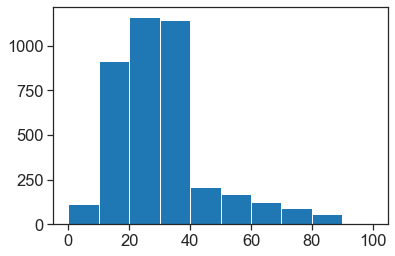

In [85]:
plt.hist(fulldata['GestWeekColl'],range=(0,100))

In [96]:
fulldata['GestWeekColl'].value_counts().sort_index().tail(n=20)

87.0      4
88.0      3
89.0      5
90.0      4
91.0      2
93.0      4
5895.0    1
5896.0    1
5897.0    1
5898.0    1
5899.0    1
5900.0    1
5901.0    1
5903.0    1
5904.0    1
5905.0    1
5906.0    1
5907.0    1
5908.0    1
5909.0    1
Name: GestWeekColl, dtype: int64

In [151]:
fulldata = fulldata[fulldata['GestWeekColl']<5000]

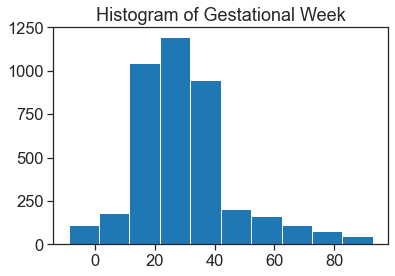

In [106]:
plt.hist(fulldata['GestWeekColl'])
plt.title("Histogram of Gestational Week")
plt.savefig(basedir + '/figures/gestweekcollhist.png',bbox_inches = 'tight')

In [199]:
fulldata = fulldata[~fulldata['SubjectID'].isin(['10007','10012','10002'])]

In [200]:
fulldata[['SubjectID','Gdwithdrawal']].drop_duplicates().sort_values(by='Gdwithdrawal')

,SubjectID,Gdwithdrawal
1,10005,NaN
2,10001,NaN
6,10003,NaN
9,10004,NaN
11,10006,NaN
25,10008,NaN
31,10009,NaN
34,10013,NaN
65,10014,NaN
351,10017,NaN


In [187]:
miscarriage = fulldata[['SubjectID','intra_ut_fetal_demise']].drop_duplicates().sort_values(by='intra_ut_fetal_demise')
miscarriage

,SubjectID,intra_ut_fetal_demise
0,10002,F
522,10024,F
524,10025,F
540,19010,F
576,10023,F
577,10028,F
578,10027,F
662,10029,F
663,10031,F
503,19007,F


In [201]:
deliveries = fulldata[['SubjectID','GestWeekdel']].drop_duplicates().sort_values(by='GestWeekdel')
deliveries

,SubjectID,GestWeekdel
662,10029,22.0
433,19009,30.0
663,10031,30.0
34,10013,35.0
352,10018,36.0
1464,10036,36.0
503,19007,37.0
454,10101,37.0
65,10014,37.0
2602,10055,37.0


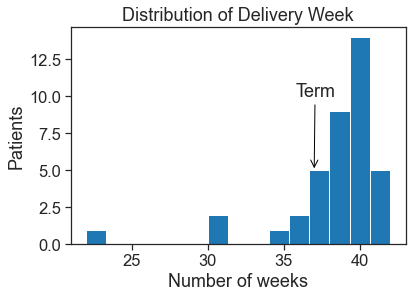

In [251]:
plt.hist(deliveries['GestWeekdel'],bins = 15)
plt.annotate("Term", xy=(37, 5), xycoords='data', xytext=(35.75, 10),ha='left', textcoords='data', 
             arrowprops=dict(arrowstyle='->', color='black',linewidth=1,connectionstyle='arc3'))
    
plt.title("Distribution of Delivery Week")
plt.xlabel("Number of weeks")
plt.ylabel("Patients")
plt.savefig(basedir + '/figures/deliveryhist.png',bbox_inches = 'tight')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


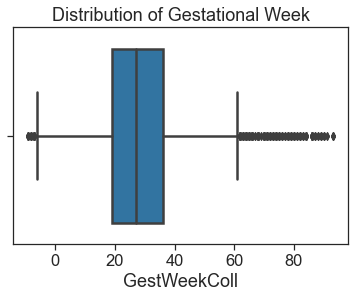

In [105]:
sns.boxplot(fulldata['GestWeekColl'])
plt.title("Distribution of Gestational Week")
plt.savefig(basedir + '/figures/gestweekcollbox.png',bbox_inches = 'tight')

In [111]:
patients_assay.columns

Index(['#SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'BodySite',
       'SubjectID', 'GestDayColl', 'GestWeekColl', 'TrimColl',
       'intra_ut_fetal_demise', 'History_of_preterm_delivery', 'Withdrew',
       'Gdwithdrawal', 'GWwithdrawal', 'Delivered', 'GestDayDel',
       'GestWeekdel', 'Labor_Initiation', 'Indication', 'PPROM',
       'Chorioamnionitis', 'Endometritis', 'Hypertensive Disorder',
       'Preeclampsia', 'Birthweight_kg', 'Length_at_birth', 'Number_of_babies',
       'Race', 'Ethnicity', 'ReversePrimer', 'Saliva_volume_uL',
       'Note_any_concerns_regarding_the_specimen', 'Run_No',
       'Number_within_run', 'Bead_Beating_Time', 'Description'],
      dtype='object')

In [267]:
fulldata['History_of_preterm_delivery'].fillna(0, inplace = True)
fulldata['PPROM'].fillna(0, inplace = True)
fulldata['Chorioamnionitis'].fillna(0, inplace = True)
fulldata['Endometritis'].fillna(0, inplace = True)
fulldata['Hypertensive Disorder'].fillna(0, inplace = True)
fulldata['Preeclampsia'].fillna(0, inplace = True)
fulldata['Number_of_babies'].fillna(0, inplace = True)
fulldata['Binary_baby'].fillna(0, inplace = True)

In [161]:
# todo: changes PPROM Yes to 1 and no to 0
def PPROM(row):
    if row['PPROM'] == 'Yes':
        return 1
        #print(1)
    elif row['PPROM'] == 'No':
        return 0
        #print(0)

fulldata['PPROM'] = fulldata.apply(PPROM, axis = 1)

In [253]:
fulldata['Preeclampsia'].value_counts()

0.0    3260
1.0     621
Name: Preeclampsia, dtype: int64

In [204]:
# todo: change strings in hypertensive disorder where 0 is none/NA, 1 is mild, 2 is severe, 3 is chronic
def hypertension(row):
    if row['Hypertensive Disorder'] == 'None':
        return 0
    elif row['Hypertensive Disorder'] == 'Mild gestational hypertension' or row['Hypertensive Disorder'] == 'Mild Pre-eclampsia':
        return 1
    elif row['Hypertensive Disorder'] == 'Severe gestational hypertension' or row['Hypertensive Disorder'] == 'Severe Pre-eclampsia':
        return 2
    elif row['Hypertensive Disorder'] == 'Chronic Hypertension':
        return 3
    
fulldata['Hypertensive Disorder'] = fulldata.apply(hypertension, axis = 1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [252]:
# todo: change preeclampsia to 1 and 0 instead of T and F
def preeC(row):
    if row['Preeclampsia'] == 'T':
        return 1
    elif row['Preeclampsia'] == 'F':
        return 0
    
fulldata['Preeclampsia'] = fulldata.apply(preeC, axis = 1)

In [263]:
fulldata[['SubjectID','Number_of_babies']].drop_duplicates().value_counts()

SubjectID  Number_of_babies
10003      1.0                 1
10046      1.0                 1
10034      1.0                 1
10036      1.0                 1
10039      1.0                 1
10040      1.0                 1
10043      1.0                 1
10044      1.0                 1
10045      1.0                 1
10047      1.0                 1
10031      1.0                 1
10055      1.0                 1
10101      1.0                 1
19004      1.0                 1
19005      1.0                 1
19006      1.0                 1
19007      1.0                 1
19009      3.0                 1
10032      1.0                 1
10029      1.0                 1
10004      1.0                 1
10017      1.0                 1
10005      1.0                 1
10006      1.0                 1
10008      1.0                 1
10009      1.0                 1
10013      2.0                 1
10014      1.0                 1
10016      1.0                 1
10018      1.0 

In [262]:
fulldata[['SubjectID','Hypertensive Disorder','Preeclampsia','PPROM','Chorioamnionitis',
          'History_of_preterm_delivery']].drop_duplicates().value_counts()
# don't use endometritis

SubjectID  Hypertensive Disorder  Preeclampsia  PPROM  Chorioamnionitis  History_of_preterm_delivery
10001      0.0                    0.0           0.0    0.0               0.0                            1
10003      1.0                    0.0           0.0    0.0               1.0                            1
10032      1.0                    0.0           0.0    0.0               0.0                            1
10034      0.0                    0.0           0.0    0.0               1.0                            1
10036      0.0                    0.0           1.0    0.0               0.0                            1
10039      0.0                    0.0           0.0    0.0               0.0                            1
10040      0.0                    0.0           0.0    0.0               0.0                            1
10043      0.0                    0.0           0.0    0.0               0.0                            1
10044      0.0                    0.0           0.0

In [265]:
# todo: if more than 1 baby, change to 1
# if 1 baby, change to 0
def baby(row):
    if row['Number_of_babies'] >= 2:
        return 1
    elif row['Number_of_babies'] == 1:
        return 0
    
fulldata['Binary_baby'] = fulldata.apply(baby, axis = 1)

In [268]:
fulldata[['SubjectID','Number_of_babies','Binary_baby']].drop_duplicates()

,SubjectID,Number_of_babies,Binary_baby
1,10005,1.0,0.0
2,10001,0.0,0.0
6,10003,1.0,0.0
9,10004,1.0,0.0
11,10006,1.0,0.0
25,10008,1.0,0.0
31,10009,1.0,0.0
34,10013,2.0,1.0
65,10014,1.0,0.0
351,10017,1.0,0.0
